In [2]:
import numpy as np

In [3]:
import time

In [4]:
import matplotlib.pyplot as plt

In [18]:
# Define parameter values
A=1
alpha=0.3
beta=0.9

In [19]:
n_k=101

In [20]:
delta_values=[0.1,1]

In [21]:
#Define our tolerance
toler = 1e-5

In [22]:
# Define the utility function
def u(c):
    return np.log(c)

In [23]:
#Create initial guess for the value function
v_init=np.zeros(shape=(n_k,1))

In [24]:
max_iter=10000

In [25]:
policy=np.zeros(shape=(n_k,1))

In [26]:
v1=np.zeros(shape=(n_k,1))

In [27]:
v=np.zeros(shape=(n_k,1))

In [28]:
def Tv(v, k, d):
    start_time = time.time()
    #Start with iteration 0
    iter = 0
    #We need to set an initial error
    error = toler+1 
    #While these two conditions are true, do this.
    while (toler<error) and (iter<max_iter):
    #We will use this vector to store the distance between the given value function and the new.
        distance=np.zeros(shape=(n_k,1)) 
        #That is, for each element of the capital grid, perform the following:
        for i in range(len(k)):
            #We need to set an initial value for vmax. As soon as we do something, this will update
            vmax = -np.inf
            #Fixing an element in the grid, calculate consumption and the value of selecting each feasible capital stock tomorrow
            for j in range(len(k)): 
                #Consumption
                c = A * k[i] ** alpha + (1-d) * k[i] - k[j] 
                #remember that c must be nonnegative
                if c>=0: 
                    #calculate the value using the consumption from above, and the current element j of the value function, which represents the value of having that capital stock tomorrow.
                    v_temp = u(c)+beta*v[j] 
                    #if the choice j' is better than j, then
                    if v_temp>vmax: 
                        #set j' as the new best choice
                        vmax=v_temp 
                        #and set that choice j' as the policy for element i of the capital stock
                        policy_i=k[j]
                #Now, once we have found vmax for a given i, set element i of the new value function to be that value 
                v1[i]=vmax 
                #Find the new policy function by setting element i to be the best choice j'
                policy[i]=policy_i 
                #new distance
                distance[i]=np.abs(vmax-v[i]) 
        #set new error
        error=np.max(distance) 
        #set v as the new calculation v1       
        v=np.copy(v1) 

        if iter % 10 == 0:
            #print Iteration number and error size every 10 iterations
            print(f"Iteration {iter}, Max Error: {error}") 
        iter+=1

    if iter == max_iter:
        #if we don't converge, let me know
        print("Failed to converge in max_iter iterations") 
    # Record end time
    end_time = time.time() 
    #how long did it take? 
    execution_time = end_time - start_time 
    print(f"Execution time: {execution_time} seconds")
    #give me the value fuction and the policy function
    return v, policy 


iterating for delta = 0.1:
Iteration 0, Max Error: 3.453909262767681
Iteration 10, Max Error: 1.204303693988777
Iteration 20, Max Error: 0.4199147334266726
Iteration 30, Max Error: 0.1464152142262236
Iteration 40, Max Error: 0.051051828503304364
Iteration 50, Max Error: 0.017800671926785583
Iteration 60, Max Error: 0.006206710520167746
Iteration 70, Max Error: 0.0021641461423271835
Iteration 80, Max Error: 0.0007545911010566897
Iteration 90, Max Error: 0.00026310964803144543
Iteration 100, Max Error: 9.17406616451899e-05
Iteration 110, Max Error: 3.198799080195158e-05
Iteration 120, Max Error: 1.1153522734730359e-05
Execution time: 8.039149761199951 seconds


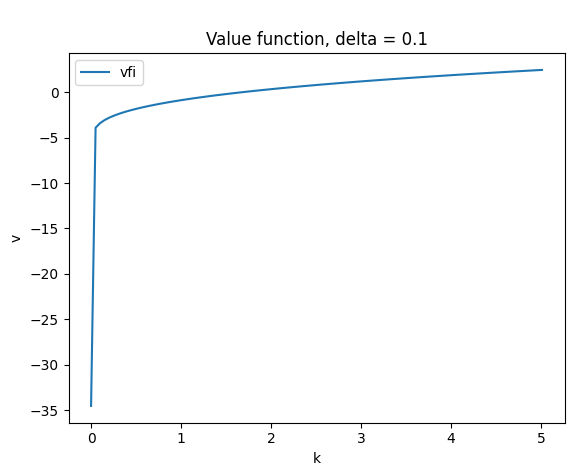

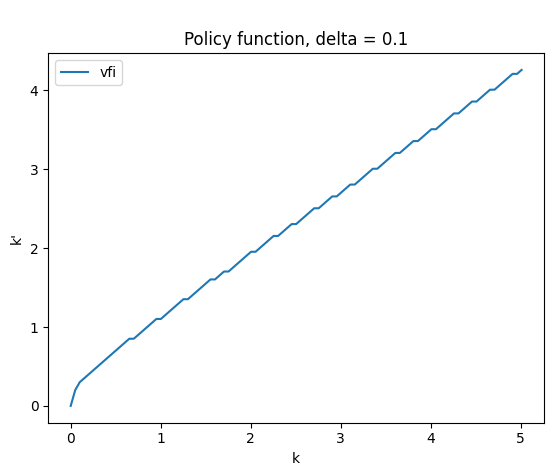


iterating for delta = 1:
Iteration 0, Max Error: 3.4541939172676286


C:\Users\bayle\AppData\Local\Temp\ipykernel_5452\1839313842.py:3: RuntimeWarning: divide by zero encountered in log
  return np.log(c)


Iteration 10, Max Error: 0.3181373301855217
Iteration 20, Max Error: 0.11092762802666556
Iteration 30, Max Error: 0.03867807230433229
Iteration 40, Max Error: 0.01348620991715066
Iteration 50, Max Error: 0.00470235063677471
Iteration 60, Max Error: 0.0016396082848348925
Iteration 70, Max Error: 0.0005716960591328757
Iteration 80, Max Error: 0.00019933809011263293
Iteration 90, Max Error: 6.950489431467588e-05
Iteration 100, Max Error: 2.423485813096704e-05
Execution time: 7.528294324874878 seconds


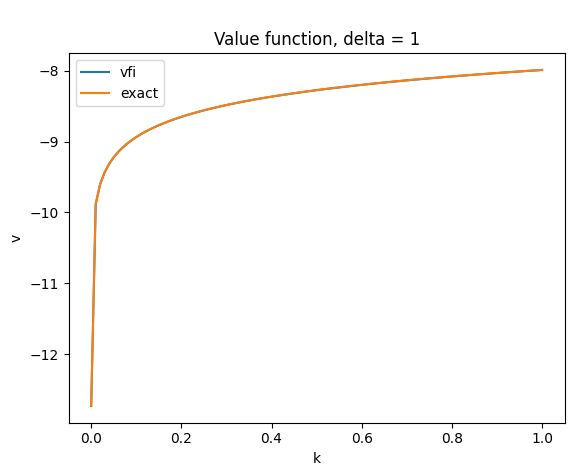

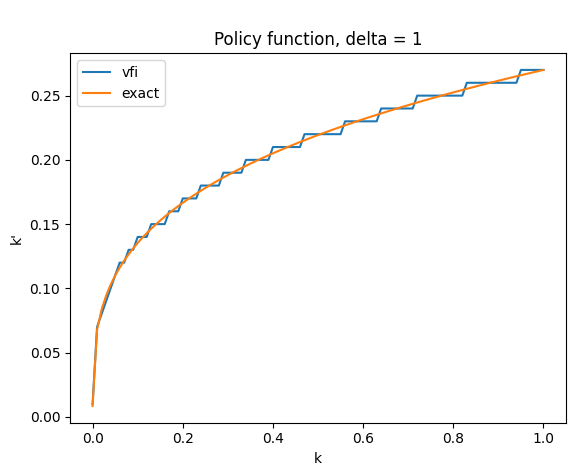

In [29]:
for delta in delta_values:
    if delta == 1:
        K_tilde = ( A / delta ) ** (1/1-alpha)
        K_grid = np.linspace(1e-5 , K_tilde, n_k)
        print(f"\niterating for delta = {delta}:")
        final_v, final_policy = Tv(v_init, K_grid, delta)
        a0 = (np.log(A) + (1 - alpha * beta) * np.log(1 - alpha * beta) \
        + alpha * beta * np.log(alpha * beta)) / ((1 - beta) * (1 - alpha * beta))
        a1 = alpha / (1 - alpha * beta)
        plt.plot(K_grid, final_v, label='vfi')
        plt.plot(K_grid, a0 + a1 * np.log(K_grid), label='exact')
        plt.title(f"\nValue function, delta = {delta}")
        plt.xlabel('k')
        plt.ylabel("v")
        plt.legend()
        plt.show()
        plt.plot(K_grid, final_policy, label='vfi')
        plt.plot(K_grid, A * alpha * beta * K_grid ** alpha, label='exact')
        plt.title(f"\nPolicy function, delta = {delta}")
        plt.xlabel('k')
        plt.ylabel("k'")
        plt.legend()
        plt.show()
    else:
        K_tilde = ( A / delta ) ** (1/1-alpha)
        K_grid = np.linspace(1e-5 , K_tilde, n_k)
        print(f"\niterating for delta = {delta}:")
        final_v, final_policy = Tv(v_init, K_grid, delta)
        plt.plot(K_grid, final_v, label='vfi')
        plt.title(f"\nValue function, delta = {delta}")
        plt.xlabel('k')
        plt.ylabel("v")
        plt.legend()
        plt.show()
        plt.plot(K_grid, final_policy, label='vfi')
        plt.title(f"\nPolicy function, delta = {delta}")
        plt.xlabel('k')
        plt.ylabel("k'")
        plt.legend()
        plt.show()



In [30]:
m_values=[5,10,25,100,500]

In [57]:
def Tv_howard(v, k, m, d): #Orginial 
    start_time = time.time()
    iter = 0 
    error = toler+1
    idx=np.zeros(shape=(n_k,1), dtype=int)
    v1=np.zeros(shape=(n_k,1))
    v2=np.zeros(shape=(n_k,1))
    while (toler<error) and (iter<max_iter): 
        distance=np.zeros(shape=(n_k,1)) 
        policy_i=np.zeros(shape=(n_k,1))
        for i in range(len(k)):
            vmax = -np.inf 
            for j in range(len(k)):
                c = A * k[i] ** alpha + (1-d) * k[i] - k[j] 
                if c>=0: 
                    v_temp = u(c)+beta*v[j] 
                    if v_temp>vmax: 
                        vmax=v_temp 
                        policy_i[i]=k[j]
                        idx[i]=j
                v1[i]=vmax     
        #v=np.copy(v1)
        for _ in range(m):
            for i in range(len(k)):
                j=idx[i]
                c = A * k[i] ** alpha + (1-d) * k[i] - policy_i[i]
                v2[i]=u(c)+beta*v1[j]
        v1=np.copy(v2)           
        for i in range(len(k)):
            distance[i]=np.abs(v1[i]-v[i]) 
        error=np.max(distance) 
        v=v1
        if iter % 10 == 0:
            print(f"Iteration {iter}, Max Error: {error}") 
        iter+=1
    if iter == max_iter:
        print("Failed to converge in max_iter iterations") 
    end_time = time.time()  
    execution_time = end_time - start_time 
    print(f"Execution time: {execution_time} seconds")
    return v, policy_i 

In [44]:
def Tv_howard(v, k, m, d):
    start_time = time.time()
    iter = 0 
    error = toler+1
    idx=np.zeros(shape=(n_k,1), dtype=int)
    v1=np.zeros(shape=(n_k,1))
    v2=np.zeros(shape=(n_k,1))
    while (toler<error) and (iter<max_iter): 
        distance=np.zeros(shape=(n_k,1)) 
        policy_i=np.zeros(shape=(n_k,1))
        for i in range(len(k)):
            vmax = -np.inf 
            for j in range(len(k)):
                c = A * k[i] ** alpha + (1-d) * k[i] - k[j] 
                if c>=0: 
                    v_temp = u(c)+beta*v[j] 
                    if v_temp>vmax: 
                        vmax=v_temp 
                        policy_i[i]=k[j]
                        idx[i]=j
                v1[i]=vmax
        v2=v1.copy()
        for _ in range(m):
            for i in range(len(k)):
                j=idx[i]
                c = A * k[i] ** alpha + (1-d) * k[i] - policy_i[i] 
                v2[i]=u(c)+beta*v1[j]
            v1=v2.copy()           
        for i in range(len(k)):
            distance[i]=np.abs(v1[i]-v[i]) 
        error=np.max(distance) 
        v=v1
        if iter % 10 == 0:
            print(f"Iteration {iter}, Max Error: {error}")
        iter+=1
    if iter == max_iter:
        print("Failed to converge in max_iter iterations") 
    end_time = time.time()  
    execution_time = end_time - start_time 
    print(f"Execution time: {execution_time} seconds")
    return v, policy_i 

In [43]:
for m in m_values:
    print(f"\niterating for m = {m}:")
    for delta in delta_values:
        print(f"\niterating for delta = {delta}:")
        if delta == 1:
            K_tilde = ( A / delta ) ** (1/1-alpha)
            K_grid = np.linspace(1e-5 , K_tilde, n_k)
            final_v, final_policy = Tv_howard(v_init, K_grid, m, delta)
            a0 = (np.log(A) + (1 - alpha * beta) * np.log(1 - alpha * beta) \
            + alpha * beta * np.log(alpha * beta)) / ((1 - beta) * (1 - alpha * beta))
            a1 = alpha / (1 - alpha * beta)
            plt.plot(K_grid, final_v, label='hpi')
            plt.plot(K_grid, a0 + a1 * np.log(K_grid), label='exact')
            plt.title(f"\nValue function, delta = {delta}, m={m}")
            plt.xlabel('k')
            plt.ylabel("v")
            plt.legend()
            plt.show()
            plt.plot(K_grid, final_policy, label='hpi')
            plt.plot(K_grid, A * alpha * beta * K_grid ** alpha, label='exact')
            plt.title(f"\nPolicy function, delta = {delta}, m={m}")
            plt.xlabel('k')
            plt.ylabel("k'")
            plt.legend()
            plt.show()
        else:
            K_tilde = ( A / delta ) ** (1/1-alpha)
            K_grid = np.linspace(1e-5 , K_tilde, n_k)
            final_v, final_policy = Tv_howard(v_init, K_grid, m, delta)
            plt.plot(K_grid, final_v, label='hpi')
            plt.title(f"\nValue function, delta = {delta}, m={m}")
            plt.xlabel('k')
            plt.ylabel("v")
            plt.legend()
            plt.show()
            plt.plot(K_grid, final_policy, label='hpi')
            plt.title(f"\nPolicy function, delta = {delta}, m={m}")
            plt.xlabel('k')
            plt.ylabel("k'")
            plt.legend()
            plt.show()


iterating for m = 5:

iterating for delta = 0.1:
Iteration 0, Max Error: 16.18360270253162
Iteration 10, Max Error: 0.022875390225991055
Iteration 20, Max Error: 0.0017984388537804416
Iteration 30, Max Error: 0.001798435454491168
Iteration 40, Max Error: 0.001798435453748505
Iteration 50, Max Error: 0.0017984354537483524
Iteration 60, Max Error: 0.0017984354537483524
Iteration 70, Max Error: 0.0017984354537483524
Iteration 80, Max Error: 0.0017984354537483524
Iteration 90, Max Error: 0.0017984354537483524
Iteration 100, Max Error: 0.0017984354537483524


KeyboardInterrupt: 

In [104]:
def Tv_bounds(v, k, bnd, d, m):
    start_time = time.time()
    iter = 0 
    error = toler+1
    idx=np.zeros(shape=(n_k,1), dtype=int)
    v1=np.zeros(shape=(n_k,1))
    v2=np.zeros(shape=(n_k,1))
    v3=np.zeros(shape=(n_k,1))
    v4=np.zeros(shape=(n_k,1))
    v5=np.zeros(shape=(n_k,1))
    vect_c=np.zeros(shape=(n_k,1))
    distance=np.zeros(shape=(n_k,1))
    while (toler<error) and (iter<max_iter): 
        policy_i=np.zeros(shape=(n_k,1))
        for i in range(len(k)):
            vmax = -np.inf 
            for j in range(len(k)):
                c = A * k[i] ** alpha + (1-delta) * k[i] - k[j] 
                if c>=0: 
                    v_temp = u(c)+beta*v[j] 
                    if v_temp>vmax: 
                        vmax=v_temp 
                        policy_i[i]=k[j]
                        idx[i]=j
                v1[i]=vmax     
        v2=np.copy(v1)
        for _ in range(m):
            for i in range(len(k)):
                j=idx[i]
                c = A * k[i] ** alpha + (1-d) * k[i] - policy_i[i]
                v2[i]=u(c)+beta*v1[j]
            v1=v2
        v4=np.copy(v1)
        if iter % bnd == 0:
            for i in range(len(c)):           
                vect_c[i] = v4[i] - v[i]
            c_low = (beta / (1 - beta)) * np.min(vect_c)
            c_high = (beta / (1 - beta)) * np.max(vect_c)
            for i in range(len(k)):
                v5[i]=v4[i]+(c_low+c_high)/2
            v=np.copy(v5)
            error=c_high-c_low
        else:
            for i in range(len(k)):
                distance[i]=np.abs(v4[i]-v[i])
            v=v4 
            error=np.max(distance) 
        if iter % 10 == 0:
            print(f"Iteration {iter}, Max Error: {error}") 
        iter+=1
    if iter == max_iter:
        print("Failed to converge in max_iter iterations") 
    end_time = time.time()  
    execution_time = end_time - start_time 
    print(f"Execution time: {execution_time} seconds")
    return v, policy_i 

In [105]:
out_v, out_pol = Tv_bounds(v_init, K_grid, 1, 1, 5)

Iteration 0, Max Error: 6.800435379167521
Iteration 10, Max Error: 0.006379866284116353
Execution time: 84.64394426345825 seconds


In [107]:
def Tv_howard_bound(v, k, m, d, bnd):
    start_time = time.time()
    iter = 0 
    error = toler+1
    idx=np.zeros(shape=(n_k,1), dtype=int)
    v1=np.zeros(shape=(n_k,1))
    v2=np.zeros(shape=(n_k,1))
    v3=np.zeros(shape=(n_k,1))
    v4=np.zeros(shape=(n_k,1))
    v5=np.zeros(shape=(n_k,1))
    vect_c=np.zeros(shape=(n_k,1))
    while (toler<error) and (iter<max_iter): 
        distance=np.zeros(shape=(n_k,1)) 
        policy_i=np.zeros(shape=(n_k,1))
        for i in range(len(k)):
            vmax = -np.inf 
            for j in range(len(k)):
                c = A * k[i] ** alpha + (1-d) * k[i] - k[j] 
                if c>=0: 
                    v_temp = u(c)+beta*v[j] 
                    if v_temp>vmax: 
                        vmax=v_temp 
                        policy_i[i]=k[j]
                        idx[i]=j
                v1[i]=vmax
        v2=np.copy(v1)
        for _ in range(m):
            for i in range(len(k)):
                j=idx[i]
                c = A * k[i] ** alpha + (1-d) * k[i] - policy_i[i] 
                v2[i]=u(c)+beta*v1[j]
            v1=np.copy(v2)
        v4=np.copy(v1)
        if iter % bnd == 0:
            for i in range(len(c)):           
                vect_c[i] = v4[i] - v[i]
                c_low = (beta / (1 - beta)) * np.min(vect_c)
                c_high = (beta / (1 - beta)) * np.max(vect_c)
            for i in range(len(k)):
                v5[i]=v4[i]+(c_low+c_high)/2
            v=v5
            error=c_high-c_low
        else:
            for i in range(len(k)):
                distance[i]=np.abs(v4[i]-v[i])
            v=v4 
            error=np.max(distance) 
        if iter % 10 == 0:
            print(f"Iteration {iter}, Max Error: {error}") 
        iter+=1
    if iter == max_iter:
        print("Failed to converge in max_iter iterations") 
    end_time = time.time()  
    execution_time = end_time - start_time 
    print(f"Execution time: {execution_time} seconds")
    return v, policy_i 

In [108]:
out_v, out_pol = Tv_howard_bound(v_init, K_grid, 5, 1, 1)

Iteration 0, Max Error: 6.800444274620643
Iteration 10, Max Error: 0.0063800426951861056
Execution time: 47.16044592857361 seconds


In [87]:
bnd_vals=[1,3,5]


iterating for bnd = 1:

iterating for m = 5:

iterating for delta = 0.1:
Iteration 0, Max Error: 6.220632101406453
Execution time: 34.25572657585144 seconds


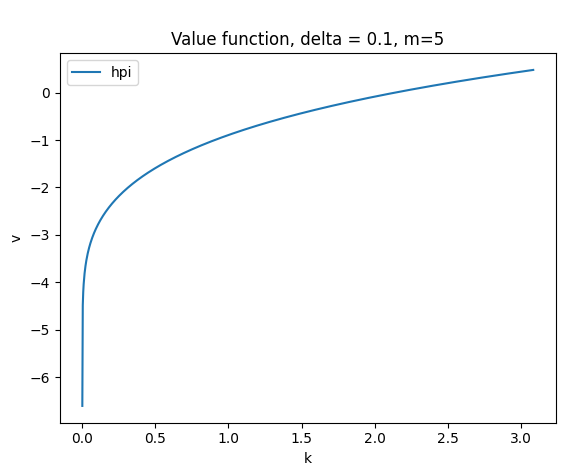

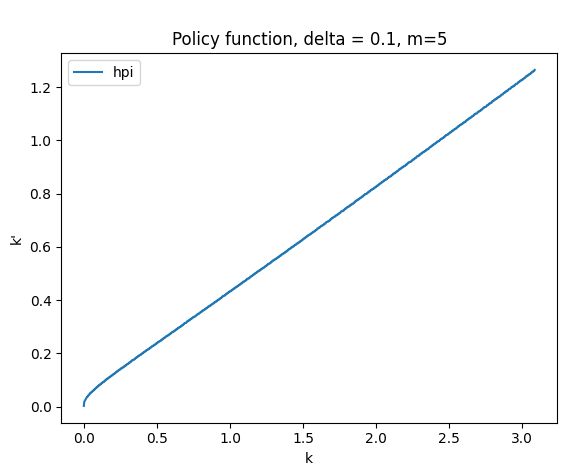


iterating for delta = 1:
Iteration 0, Max Error: 6.221486213501121
Execution time: 28.93029475212097 seconds


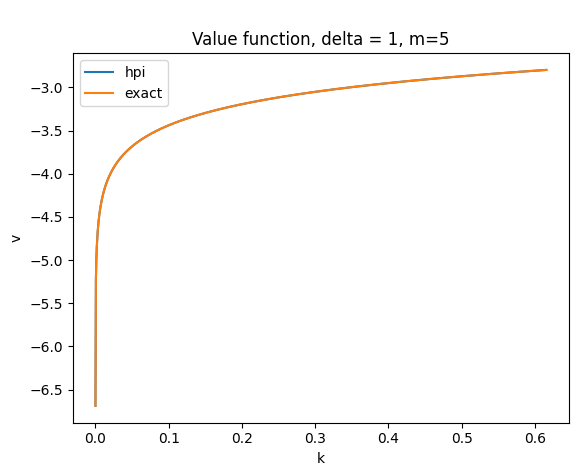

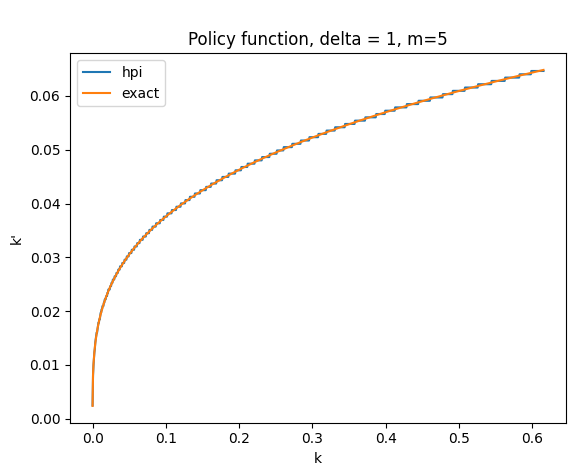


iterating for m = 10:

iterating for delta = 0.1:
Iteration 0, Max Error: 6.220632101406453
Execution time: 33.101969718933105 seconds


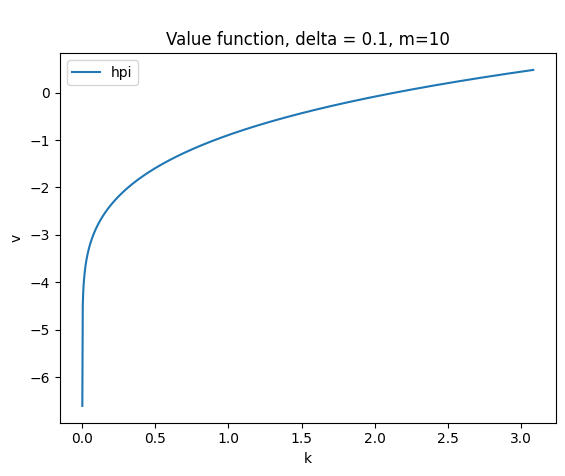

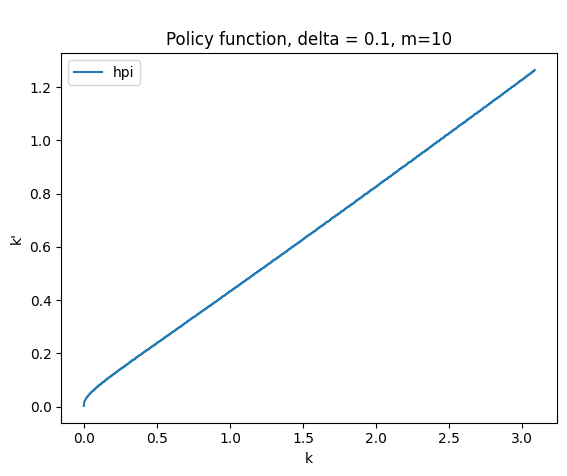


iterating for delta = 1:
Iteration 0, Max Error: 6.221486213501121
Execution time: 29.23399043083191 seconds


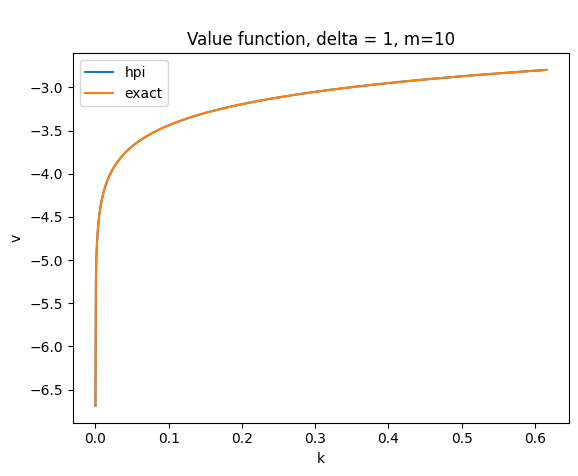

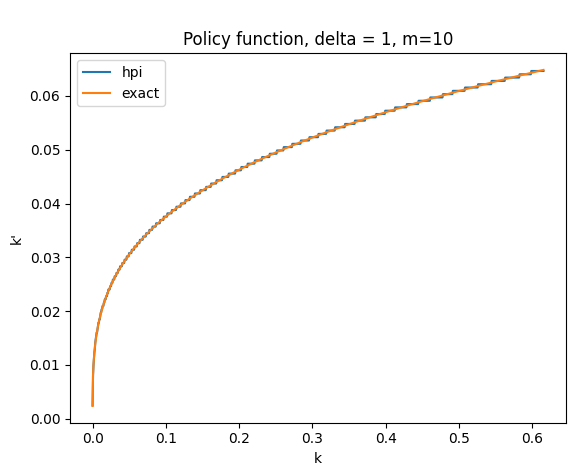


iterating for m = 25:

iterating for delta = 0.1:
Iteration 0, Max Error: 6.220632101406453
Execution time: 35.11671042442322 seconds


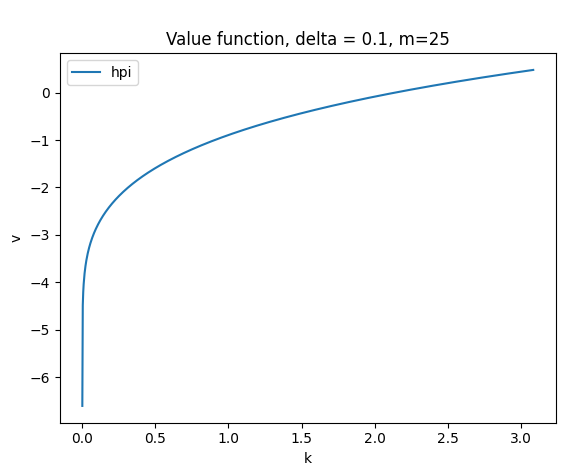

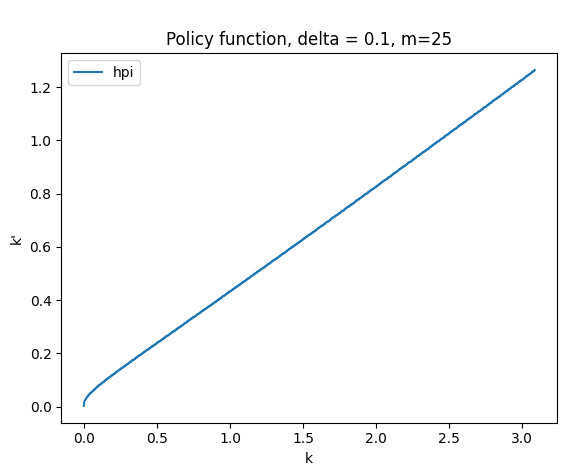


iterating for delta = 1:
Iteration 0, Max Error: 6.221486213501121
Execution time: 30.918249368667603 seconds


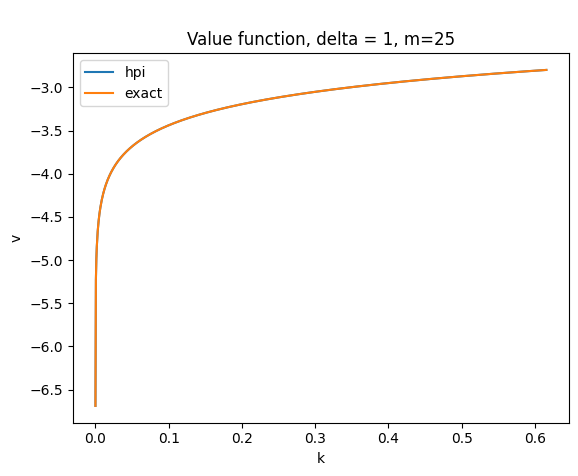

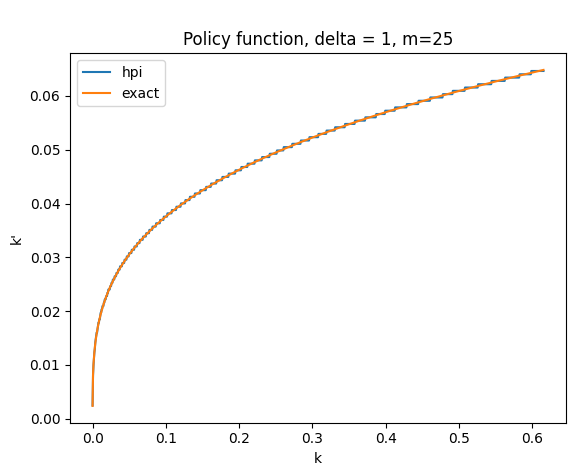


iterating for m = 100:

iterating for delta = 0.1:
Iteration 0, Max Error: 6.220632101406453
Execution time: 40.144163846969604 seconds


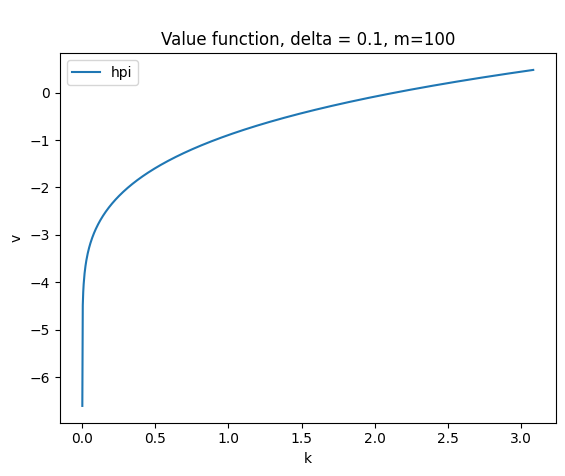

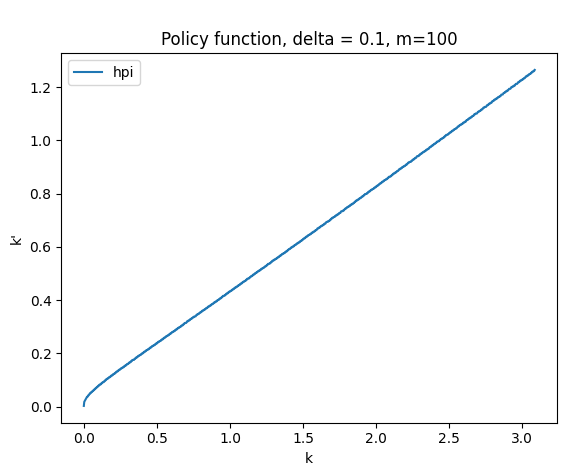


iterating for delta = 1:
Iteration 0, Max Error: 6.221486213501121
Execution time: 35.71800422668457 seconds


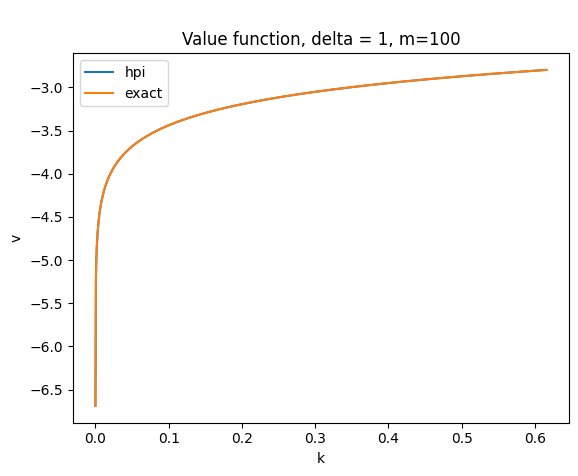

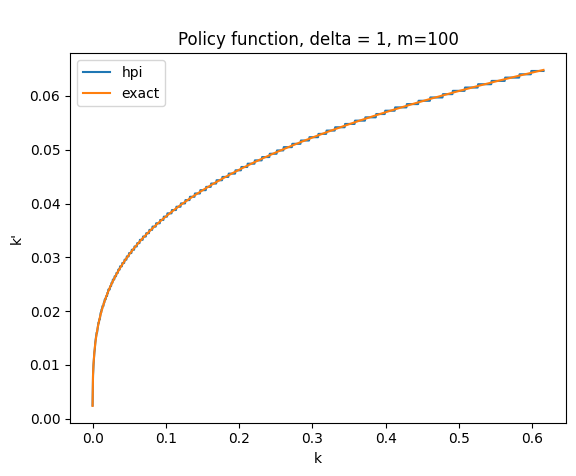


iterating for m = 500:

iterating for delta = 0.1:
Iteration 0, Max Error: 6.220632101406453
Execution time: 66.76046252250671 seconds


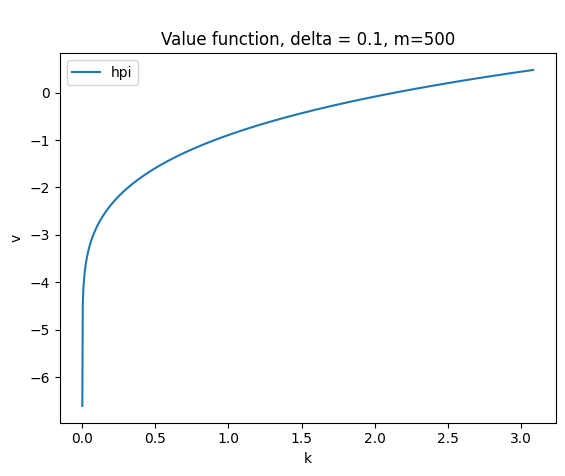

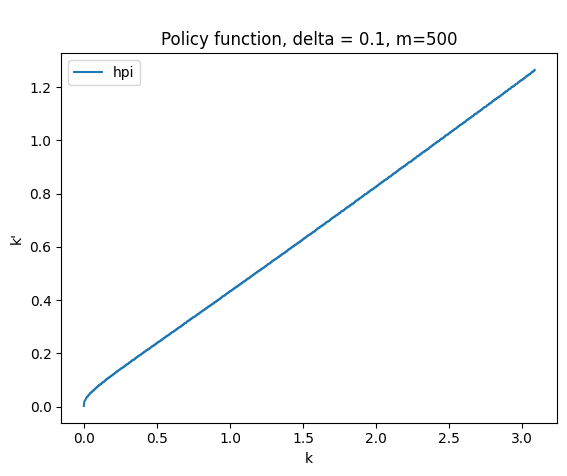


iterating for delta = 1:
Iteration 0, Max Error: 6.221486213501121
Execution time: 62.30001163482666 seconds


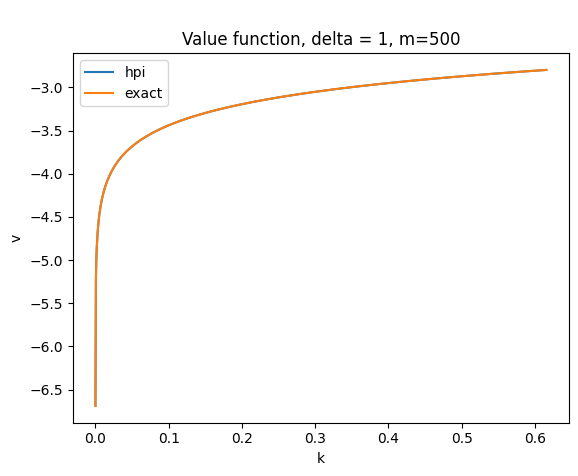

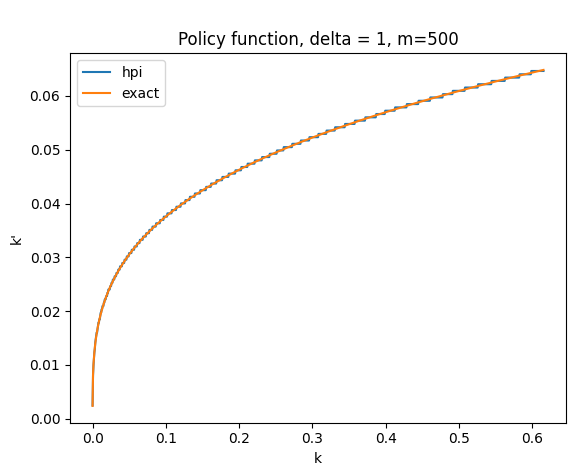


iterating for bnd = 3:

iterating for m = 5:

iterating for delta = 0.1:
Iteration 0, Max Error: 6.220632101406453
Iteration 10, Max Error: 0.0023166883846963415
Iteration 20, Max Error: 1.355294579263866e-05
Execution time: 93.44600749015808 seconds


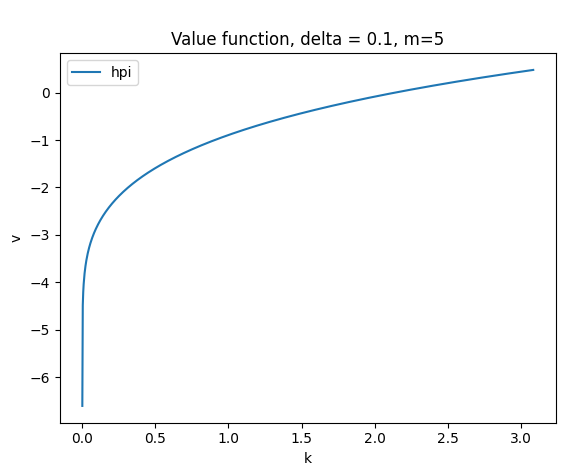

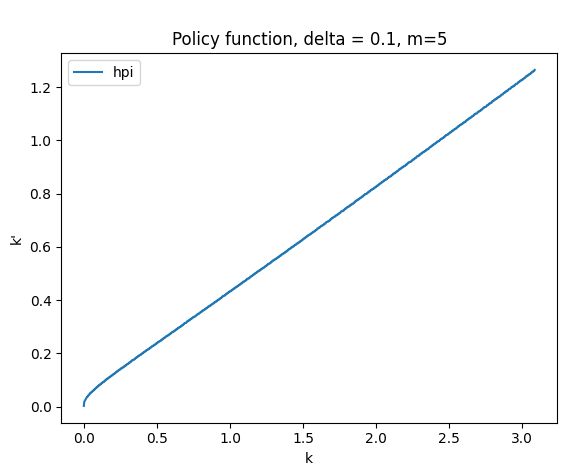


iterating for delta = 1:
Iteration 0, Max Error: 6.221486213501121
Iteration 10, Max Error: 0.0023291562893899
Execution time: 74.56420254707336 seconds


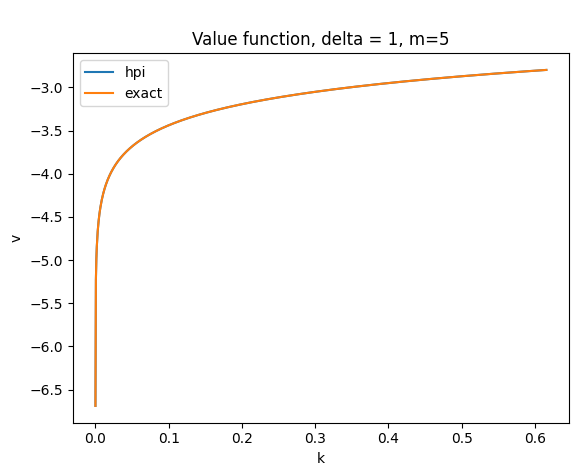

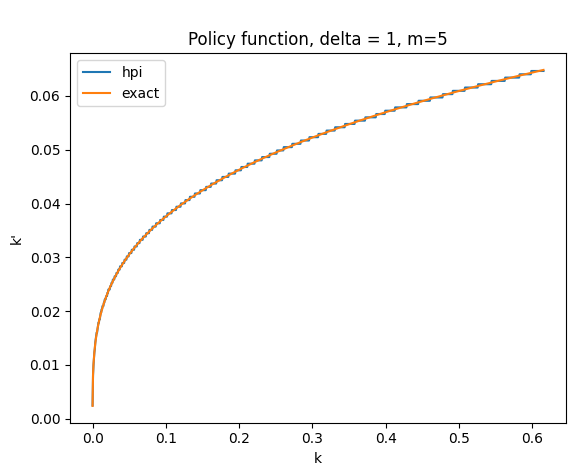


iterating for m = 10:

iterating for delta = 0.1:
Iteration 0, Max Error: 6.220632101406453
Iteration 10, Max Error: 0.0023166883846963415
Iteration 20, Max Error: 1.355294579263866e-05
Execution time: 94.23388624191284 seconds


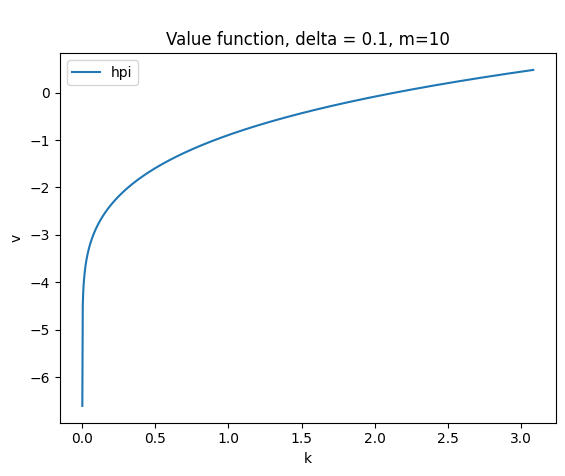

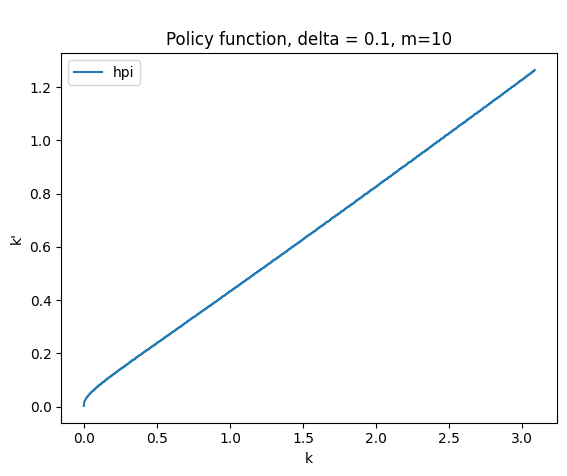


iterating for delta = 1:
Iteration 0, Max Error: 6.221486213501121
Iteration 10, Max Error: 0.0023291562893899
Execution time: 73.66924667358398 seconds


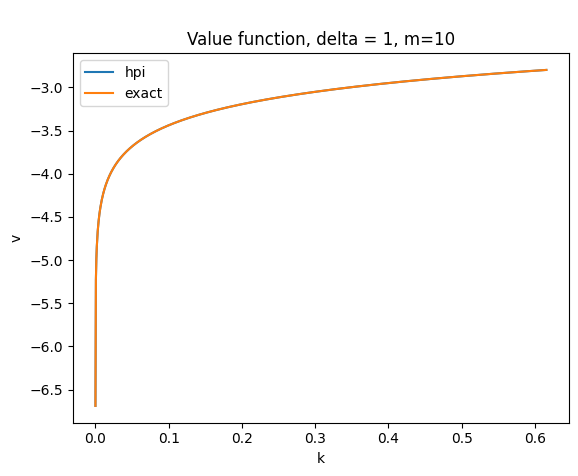

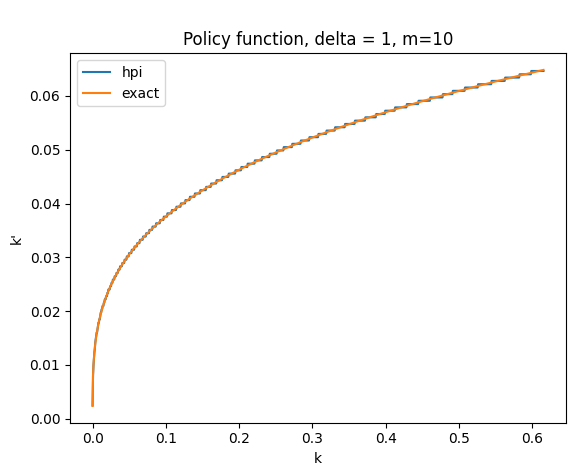


iterating for m = 25:

iterating for delta = 0.1:
Iteration 0, Max Error: 6.220632101406453
Iteration 10, Max Error: 0.0023166883846963415
Iteration 20, Max Error: 1.355294579263866e-05
Execution time: 95.91794562339783 seconds


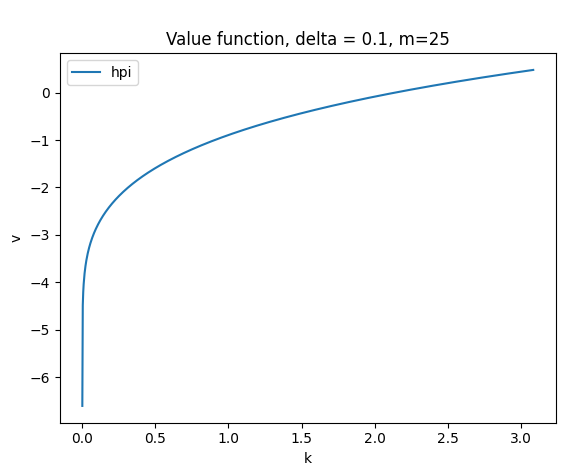

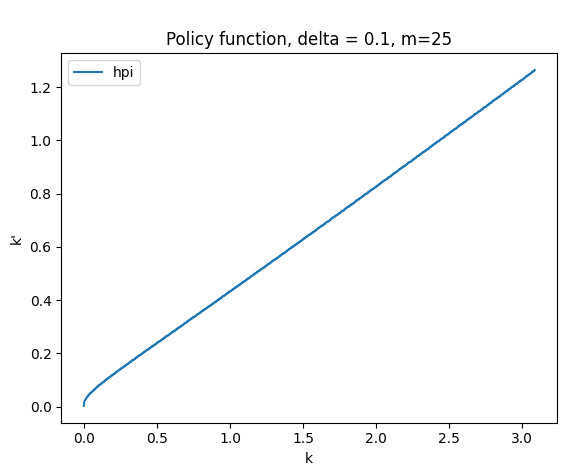


iterating for delta = 1:
Iteration 0, Max Error: 6.221486213501121
Iteration 10, Max Error: 0.0023291562893899
Execution time: 77.8308174610138 seconds


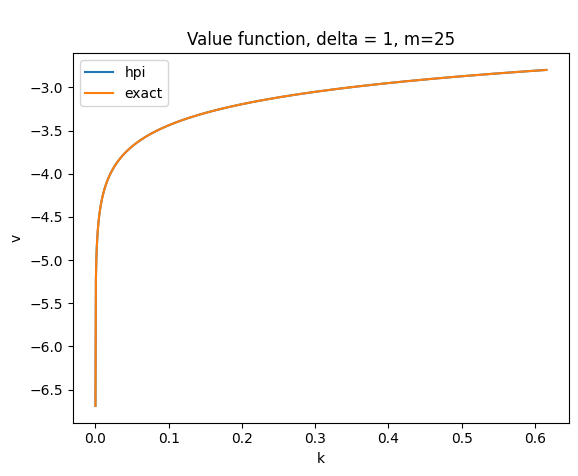

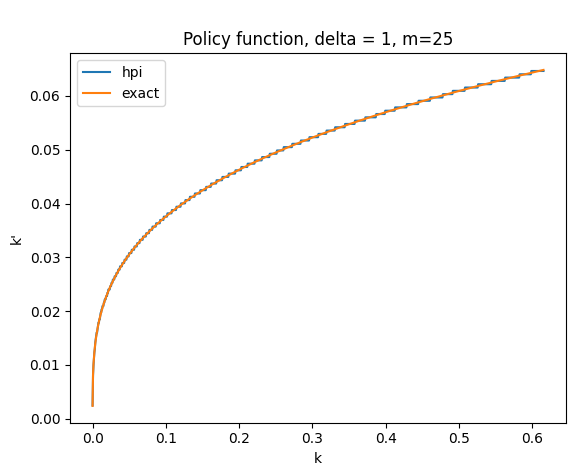


iterating for m = 100:

iterating for delta = 0.1:
Iteration 0, Max Error: 6.220632101406453
Iteration 10, Max Error: 0.0023166883846963415
Iteration 20, Max Error: 1.355294579263866e-05
Execution time: 110.32279801368713 seconds


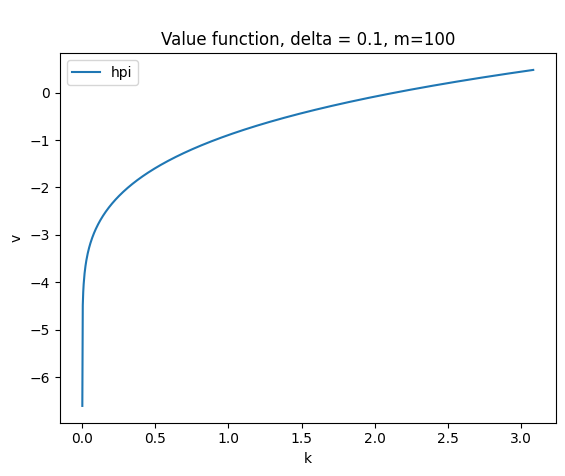

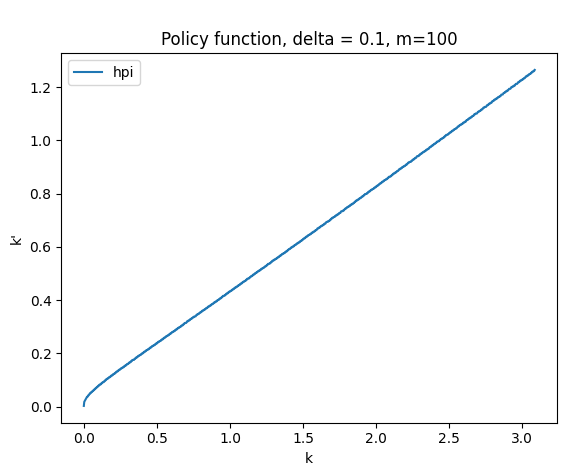


iterating for delta = 1:
Iteration 0, Max Error: 6.221486213501121
Iteration 10, Max Error: 0.0023291562893899
Execution time: 91.41700839996338 seconds


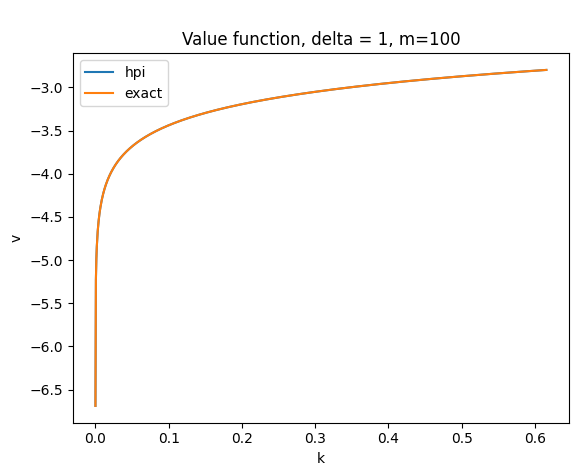

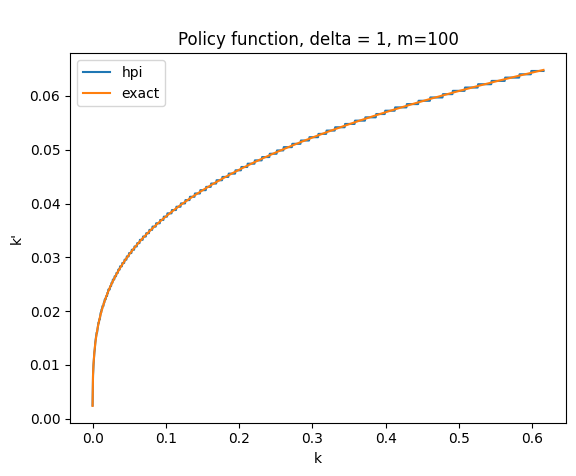


iterating for m = 500:

iterating for delta = 0.1:
Iteration 0, Max Error: 6.220632101406453
Iteration 10, Max Error: 0.0023166883846963415
Iteration 20, Max Error: 1.355294579263866e-05
Execution time: 182.92446279525757 seconds


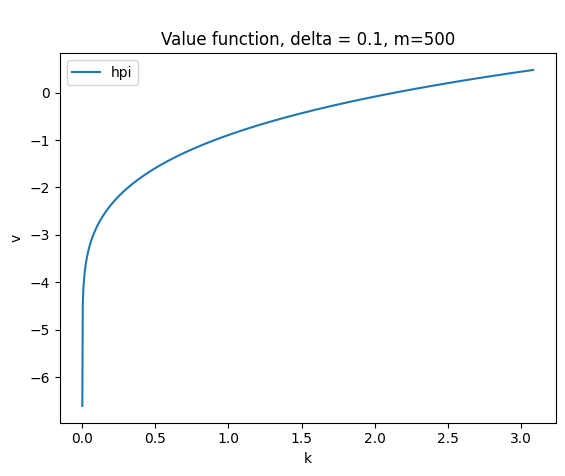

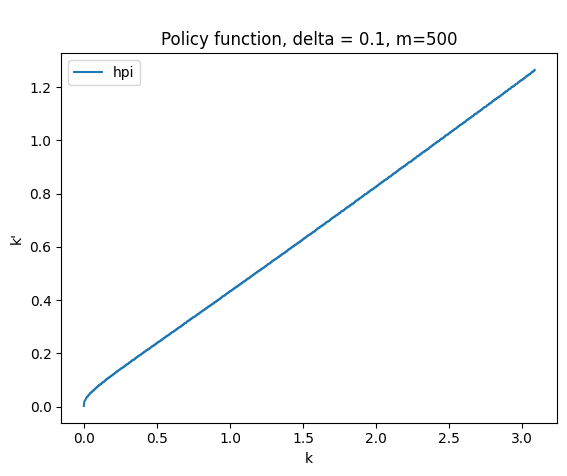


iterating for delta = 1:
Iteration 0, Max Error: 6.221486213501121
Iteration 10, Max Error: 0.0023291562893899
Execution time: 156.1914758682251 seconds


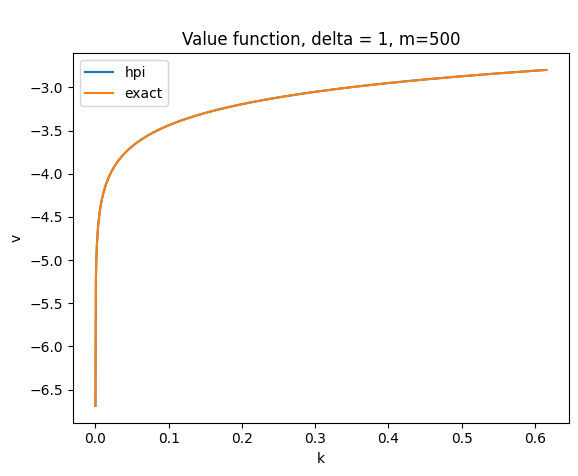

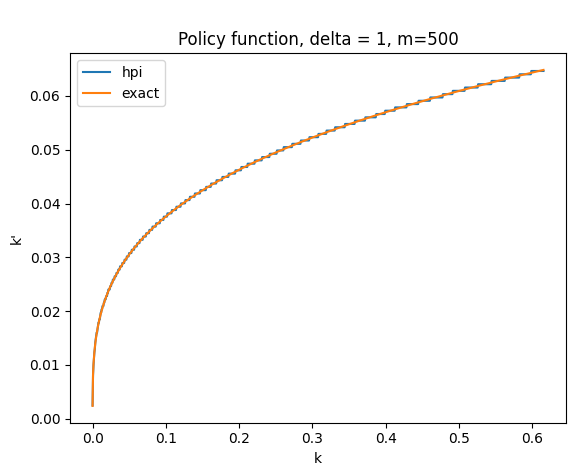


iterating for bnd = 5:

iterating for m = 5:

iterating for delta = 0.1:
Iteration 0, Max Error: 6.220632101406453
Iteration 10, Max Error: 0.12122332740376951
Iteration 20, Max Error: 0.0023166883846963415
Iteration 30, Max Error: 4.098108837080616e-05
Execution time: 151.3560438156128 seconds


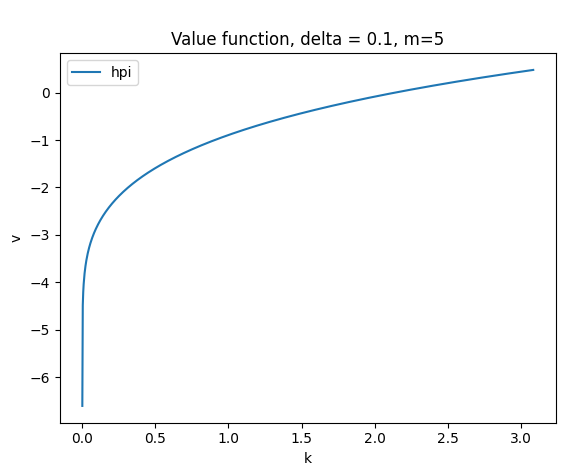

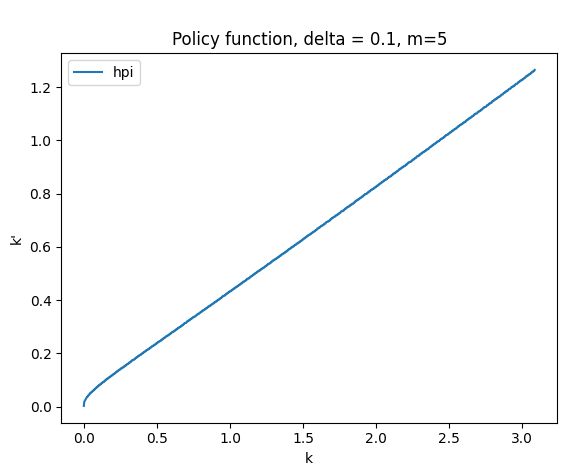


iterating for delta = 1:
Iteration 0, Max Error: 6.221486213501121
Iteration 10, Max Error: 0.13945900822332646
Iteration 20, Max Error: 0.002313262541145278
Iteration 30, Max Error: 3.621010644483391e-05
Execution time: 118.30959272384644 seconds


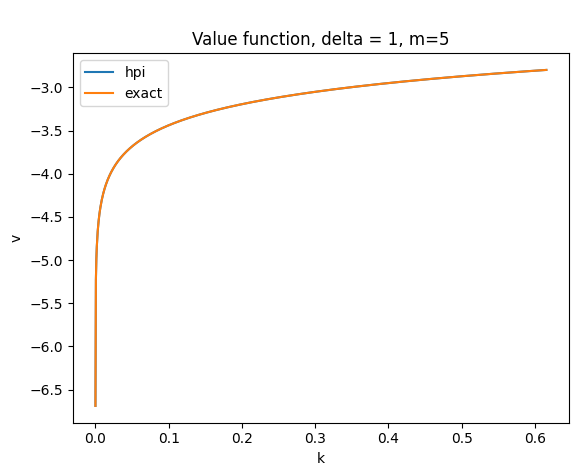

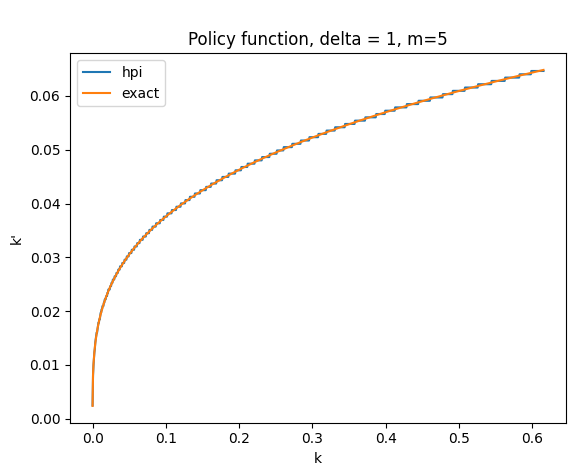


iterating for m = 10:

iterating for delta = 0.1:
Iteration 0, Max Error: 6.220632101406453
Iteration 10, Max Error: 0.12122332740376951
Iteration 20, Max Error: 0.0023166883846963415
Iteration 30, Max Error: 4.098108837080616e-05
Execution time: 156.45982241630554 seconds


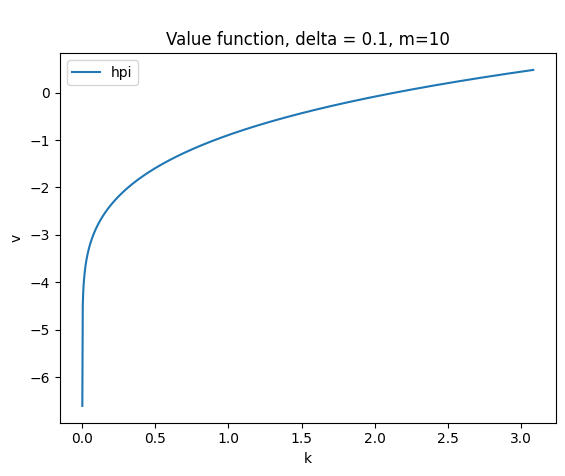

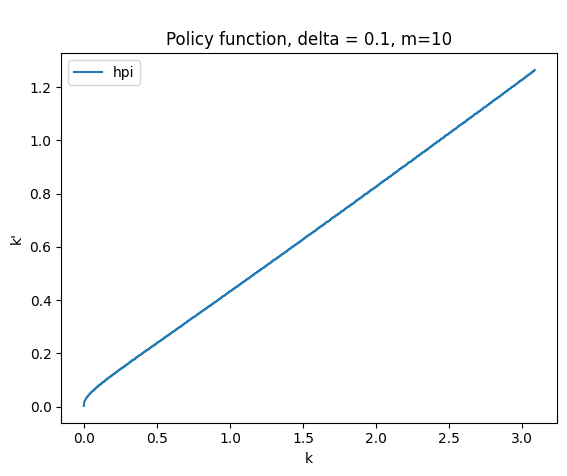


iterating for delta = 1:
Iteration 0, Max Error: 6.221486213501121
Iteration 10, Max Error: 0.13945900822332646
Iteration 20, Max Error: 0.002313262541145278
Iteration 30, Max Error: 3.621010644483391e-05
Execution time: 120.72875380516052 seconds


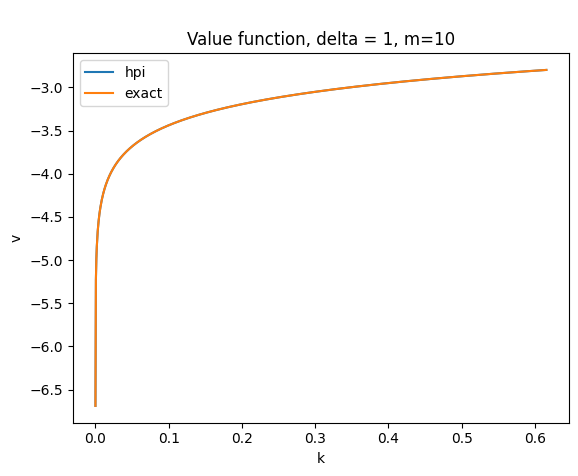

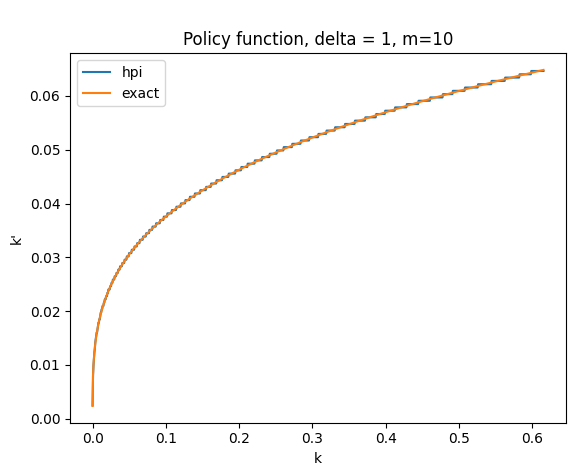


iterating for m = 25:

iterating for delta = 0.1:
Iteration 0, Max Error: 6.220632101406453
Iteration 10, Max Error: 0.12122332740376951
Iteration 20, Max Error: 0.0023166883846963415
Iteration 30, Max Error: 4.098108837080616e-05
Execution time: 160.69200134277344 seconds


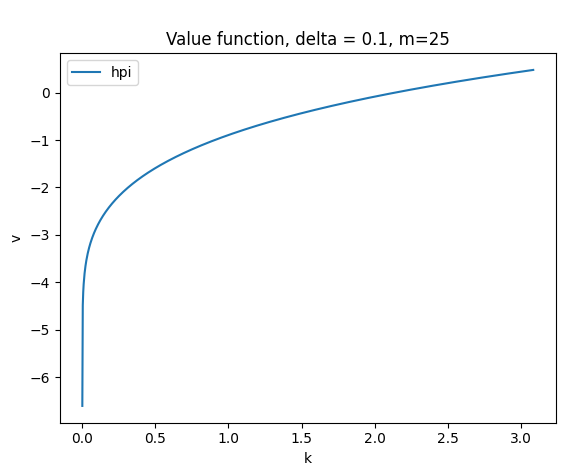

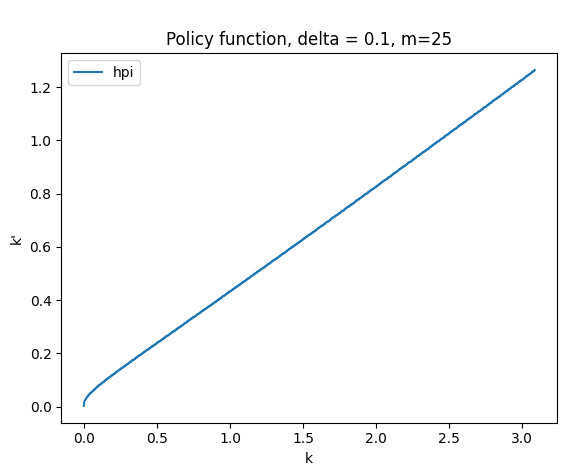


iterating for delta = 1:
Iteration 0, Max Error: 6.221486213501121
Iteration 10, Max Error: 0.13945900822332646
Iteration 20, Max Error: 0.002313262541145278
Iteration 30, Max Error: 3.621010644483391e-05
Execution time: 125.61500334739685 seconds


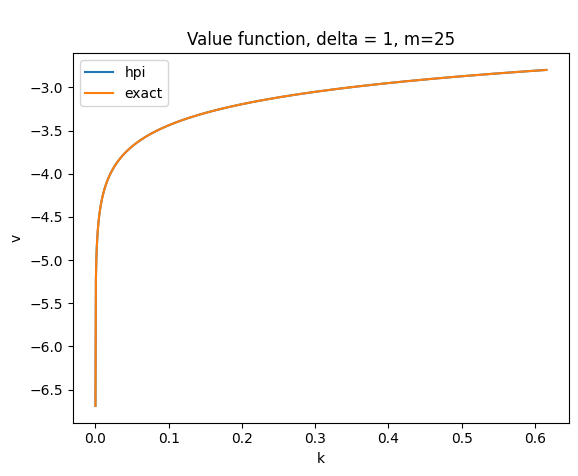

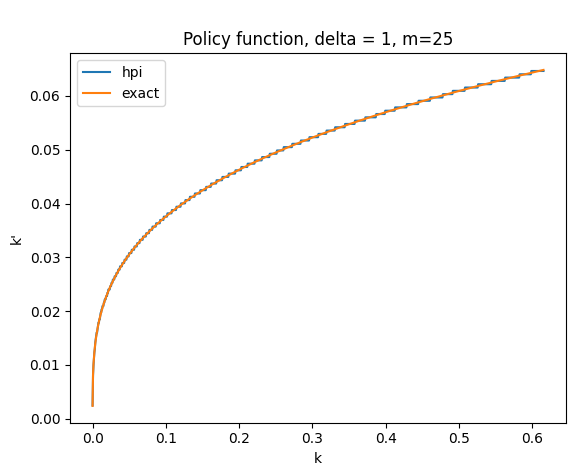


iterating for m = 100:

iterating for delta = 0.1:
Iteration 0, Max Error: 6.220632101406453
Iteration 10, Max Error: 0.12122332740376951
Iteration 20, Max Error: 0.0023166883846963415
Iteration 30, Max Error: 4.098108837080616e-05
Execution time: 183.36394143104553 seconds


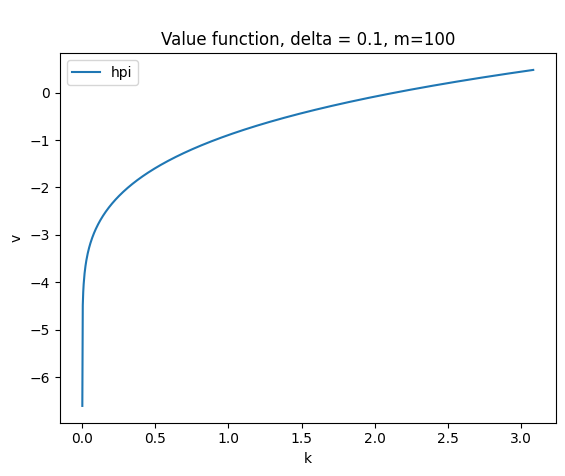

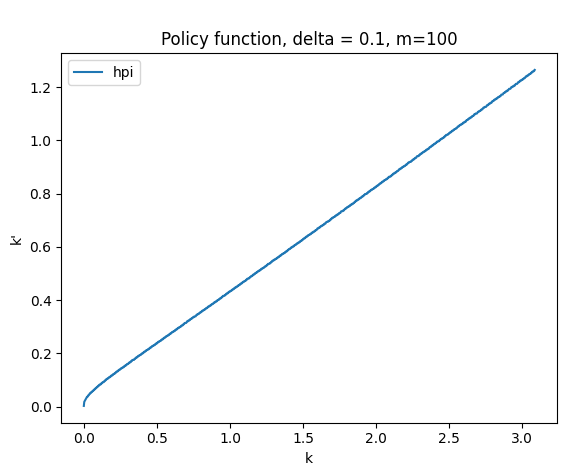


iterating for delta = 1:
Iteration 0, Max Error: 6.221486213501121
Iteration 10, Max Error: 0.13945900822332646
Iteration 20, Max Error: 0.002313262541145278
Iteration 30, Max Error: 3.621010644483391e-05
Execution time: 142.4789638519287 seconds


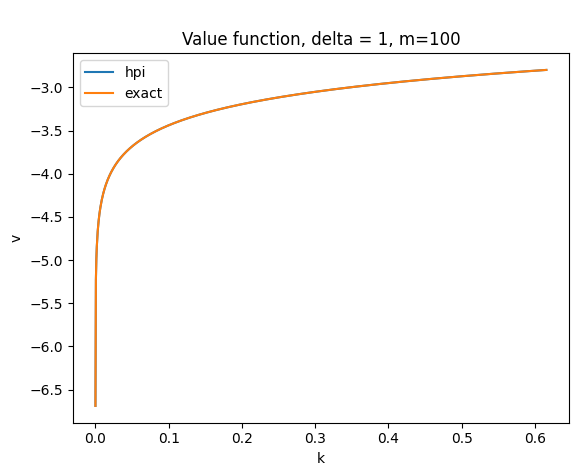

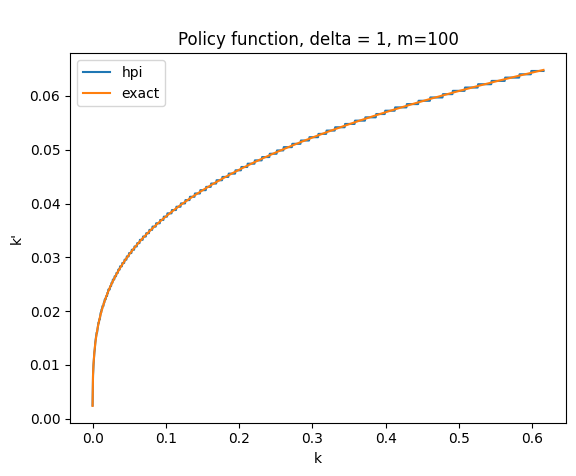


iterating for m = 500:

iterating for delta = 0.1:
Iteration 0, Max Error: 6.220632101406453
Iteration 10, Max Error: 0.12122332740376951
Iteration 20, Max Error: 0.0023166883846963415
Iteration 30, Max Error: 4.098108837080616e-05
Execution time: 291.53306341171265 seconds


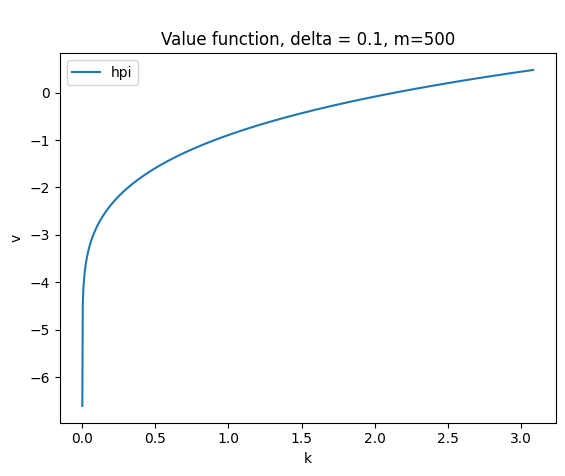

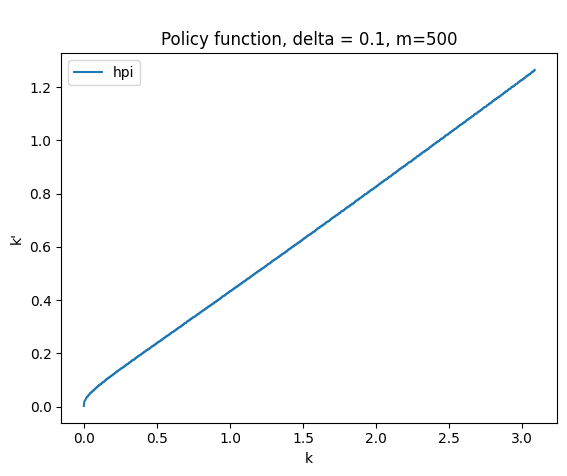


iterating for delta = 1:
Iteration 0, Max Error: 6.221486213501121
Iteration 10, Max Error: 0.13945900822332646
Iteration 20, Max Error: 0.002313262541145278
Iteration 30, Max Error: 3.621010644483391e-05
Execution time: 242.88157486915588 seconds


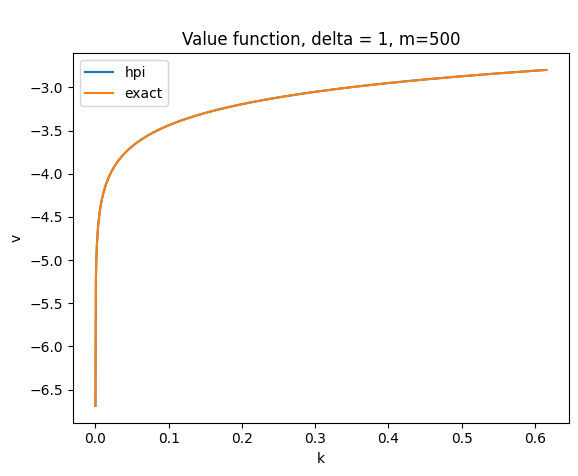

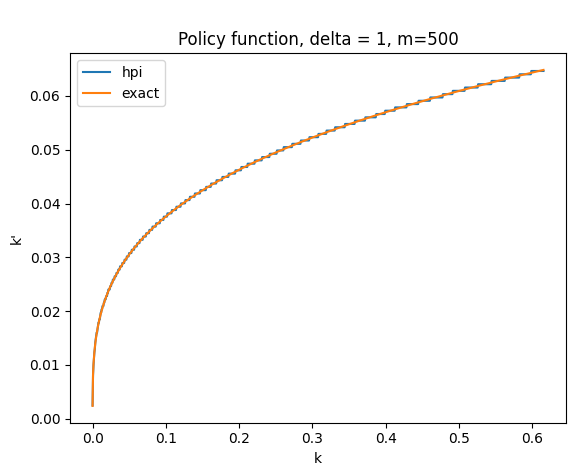

In [19]:
for bnd in bnd_vals:
    print(f"\niterating for bnd = {bnd}:")
    for m in m_values:
        print(f"\niterating for m = {m}:")
        for delta in delta_values:
            print(f"\niterating for delta = {delta}:")
            if delta == 1:
                K_tilde = ( A / delta ) ** (1/1-alpha)
                K_grid = np.linspace(1e-5 , K_tilde, n_k)
                final_v, final_policy = Tv_bounds(v_init, K_grid, bnd, delta, m)
                a0 = (np.log(A) + (1 - alpha * beta) * np.log(1 - alpha * beta) \
                + alpha * beta * np.log(alpha * beta)) / ((1 - beta) * (1 - alpha * beta))
                a1 = alpha / (1 - alpha * beta)
                plt.plot(K_grid, final_v, label='hpi')
                plt.plot(K_grid, a0 + a1 * np.log(K_grid), label='exact')
                plt.title(f"\nValue function, delta = {delta}, m={m}")
                plt.xlabel('k')
                plt.ylabel("v")
                plt.legend()
                plt.show()
                plt.plot(K_grid, final_policy, label='hpi')
                plt.plot(K_grid, A * alpha * beta * K_grid ** alpha, label='exact')
                plt.title(f"\nPolicy function, delta = {delta}, m={m}")
                plt.xlabel('k')
                plt.ylabel("k'")
                plt.legend()
                plt.show()
            else:
                K_tilde = ( A / delta ) ** (1/1-alpha)
                K_grid = np.linspace(1e-5 , K_tilde, n_k)
                final_v, final_policy = Tv_bounds(v_init, K_grid, bnd, delta, m)
                plt.plot(K_grid, final_v, label='hpi')
                plt.title(f"\nValue function, delta = {delta}, m={m}")
                plt.xlabel('k')
                plt.ylabel("v")
                plt.legend()
                plt.show()
                plt.plot(K_grid, final_policy, label='hpi')
                plt.title(f"\nPolicy function, delta = {delta}, m={m}")
                plt.xlabel('k')
                plt.ylabel("k'")
                plt.legend()
                plt.show()


iterating for bnd = 1:

iterating for m = 5:

iterating for delta = 0.1:
Iteration 0, Max Error: 6.799883861073871
Iteration 10, Max Error: 0.006459076914866024
Execution time: 87.82729768753052 seconds


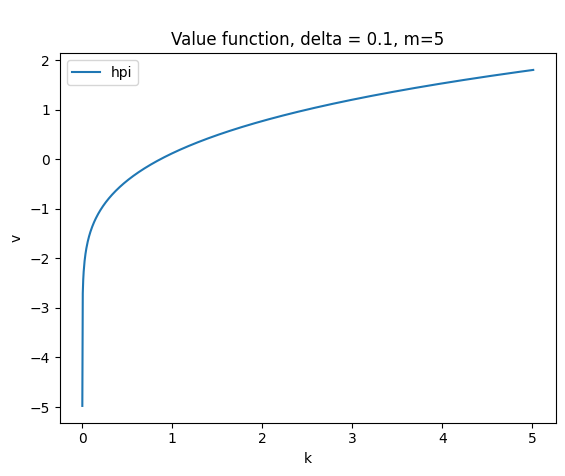

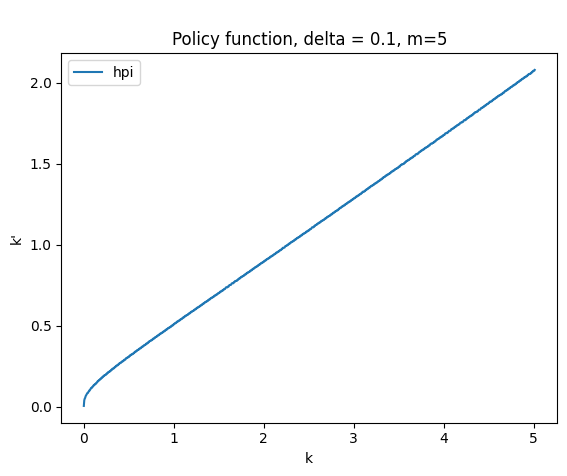


iterating for delta = 1:


C:\Users\bayle\AppData\Local\Temp\ipykernel_10924\1839313842.py:3: RuntimeWarning: divide by zero encountered in log
  return np.log(c)


Iteration 0, Max Error: 6.800444274620643
Iteration 10, Max Error: 0.006373345299081734
Execution time: 94.50566363334656 seconds


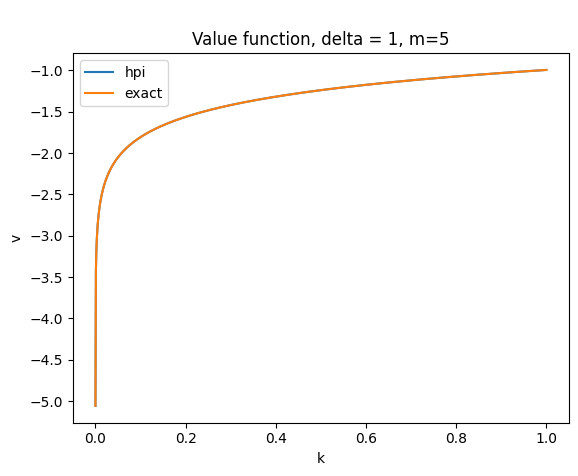

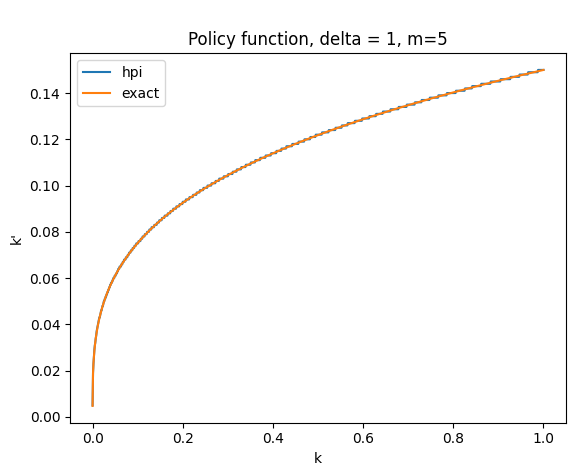


iterating for m = 10:

iterating for delta = 0.1:
Iteration 0, Max Error: 6.90444556727094
Iteration 10, Max Error: 0.010329679110295586
Iteration 20, Max Error: 9.940780267392313e-06
Execution time: 94.2746889591217 seconds


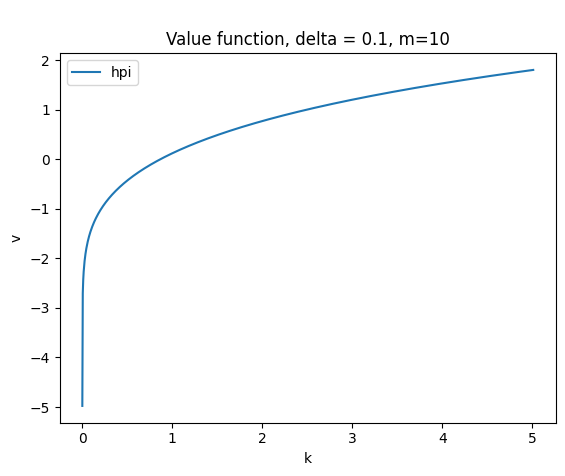

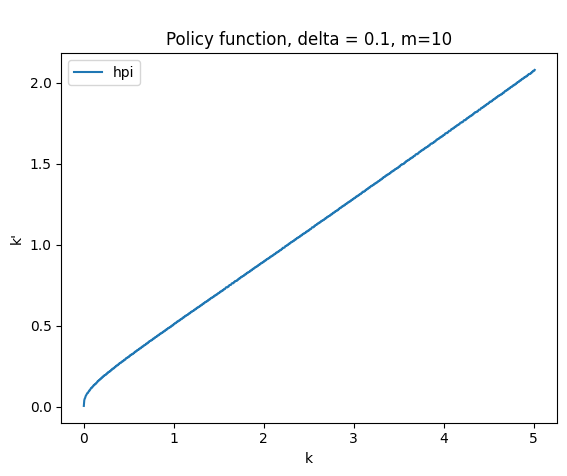


iterating for delta = 1:
Iteration 0, Max Error: 6.905014598287925


KeyboardInterrupt: 

In [109]:
for bnd in bnd_vals:
    print(f"\niterating for bnd = {bnd}:")
    for m in m_values:
        print(f"\niterating for m = {m}:")
        for delta in delta_values:
            print(f"\niterating for delta = {delta}:")
            if delta == 1:
                K_tilde = ( A / delta ) ** (1/1-alpha)
                K_grid = np.linspace(1e-5 , K_tilde, n_k)
                final_v, final_policy = Tv_howard_bound(v_init, K_grid, m, delta, bnd)
                a0 = (np.log(A) + (1 - alpha * beta) * np.log(1 - alpha * beta) \
                + alpha * beta * np.log(alpha * beta)) / ((1 - beta) * (1 - alpha * beta))
                a1 = alpha / (1 - alpha * beta)
                plt.plot(K_grid, final_v, label='hpi')
                plt.plot(K_grid, a0 + a1 * np.log(K_grid), label='exact')
                plt.title(f"\nValue function, delta = {delta}, m={m}")
                plt.xlabel('k')
                plt.ylabel("v")
                plt.legend()
                plt.show()
                plt.plot(K_grid, final_policy, label='hpi')
                plt.plot(K_grid, A * alpha * beta * K_grid ** alpha, label='exact')
                plt.title(f"\nPolicy function, delta = {delta}, m={m}")
                plt.xlabel('k')
                plt.ylabel("k'")
                plt.legend()
                plt.show()
            else:
                K_tilde = ( A / delta ) ** (1/1-alpha)
                K_grid = np.linspace(1e-5 , K_tilde, n_k)
                final_v, final_policy = Tv_howard_bound(v_init, K_grid, m, delta, bnd)
                plt.plot(K_grid, final_v, label='hpi')
                plt.title(f"\nValue function, delta = {delta}, m={m}")
                plt.xlabel('k')
                plt.ylabel("v")
                plt.legend()
                plt.show()
                plt.plot(K_grid, final_policy, label='hpi')
                plt.title(f"\nPolicy function, delta = {delta}, m={m}")
                plt.xlabel('k')
                plt.ylabel("k'")
                plt.legend()
                plt.show()

Now, we attempt to take advantage of the power of broadcasting in NumPy by vectorising our code.

In [20]:
def Tv_vec(delt, max_iteration, grid_size, A, alph, bet, toler):

    K_max = ( A / delt ) ** (1/(1-alph))
    #K_tilde = ( alph * A * bet / ( 1 + delt * bet)) ** (1/ (1-alph))

    #print(K_tilde)

    k = np.linspace(1e-5, K_max, grid_size).reshape(-1,1)

    v = np.zeros(shape=(grid_size,1))

    policy=np.zeros(shape=(grid_size,1))

    #valid_indices=np.zeros(shape=(grid_size,1))

    start_time=time.time()

    iter = 0

    error=toler+1

    while (toler < error) and (iter < max_iteration):
        
        distance = np.zeros(shape=(grid_size,1))

        # Now, take advantage of broadcasting
        # First, calculate consumption. This code will produce a matrix of size (grid_size, grid_size)
        # where element (i,j) corresponds to consumption for capital i today and capital j tomorrow.

        #c = A * k[:, np.newaxis] ** 1-alph + ( 1 - delt ) * k[:, np.newaxis] - k

        c = A * k ** alph + ( 1 - delt ) * k - k.T
        #print(c)
        #print(c.shape)

        # In principle, the above code could allow for negative consumption. We prevent that next.y
        # For np.where(condition, x, y) means that x will be applied when the condition is true, and y when false

        c_pos = np.where(c>0, c, np.nan)
        #print(c_pos)

        # Below, u is applied element-wise to c_pos, creating an (grid_size, grid_size) vector
        # as v it (grid_size, 1), we add it to each column of u(c_pos). This is what we mean by broadcasting.
        # So, v_temp_i,j = u(c)_i,j + beta * v_j.

        v_temp = u(c_pos) + bet * v
        #print(v_temp.shape)
        #print(v_temp)

        # Now, we maximise over the rows, since each row corresponds to a different current capital stock.
        # That is, for a given i, look at each column and pick the best

        vmax = np.nanmax(v_temp, axis=1)[:, np.newaxis]

        #print(vmax.shape)
        #print(vmax)

        # Similarly, find the policy function
        #valid_indices=np.where(np.isnan(v_temp))

        #policy=k[valid_indices[1][np.argmax(v_temp[valid_indices])]]
        policy = np.argmax(v_temp, axis=1)

        #print(policy)
        # Update value function and calculate distance

        v1 = vmax
        #print(v1)

        distance = np.abs(v1 - v)

        error = np.max(distance)

        v=np.copy(v1)

        if iter % 10 == 0:
            print(f"Iteration {iter}, Max Error: {error}")
        
        iter +=1

    if iter == max_iteration:
        print("Failed to converge in max_iter iterations")

    end_time = time.time()

    execution_time = end_time - start_time

    print(f"Execution time: {execution_time} seconds")

    return v, policy

In [21]:
v_vec, pol_vec = Tv_vec(1, 10000 , 1001, 0.5, 0.3, 0.5, 1e-5)
print(v_vec)
print(pol_vec)

Iteration 0, Max Error: 4.1476574756674145
Iteration 10, Max Error: 0.004050446753581127
Execution time: 0.40276145935058594 seconds
[[-8.29530704]
 [-6.10957062]
 [-5.70152032]
 ...
 [-1.98167366]
 [-1.98107276]
 [-1.98047246]]
[  43  127  156 ... 1000 1000 1000]


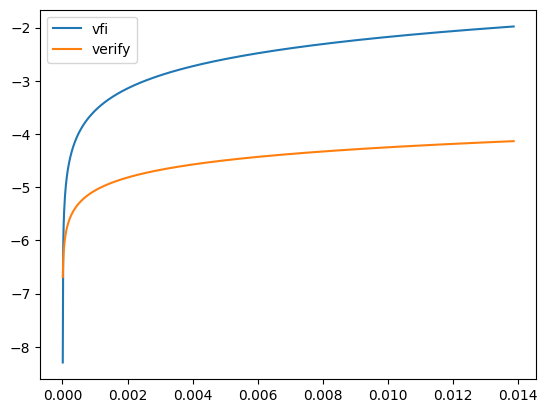

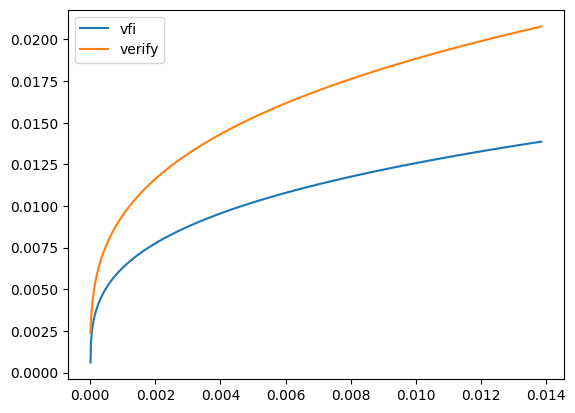

In [22]:
A = 0.5
delta = 1
beta = 0.5
alpha = 0.3
size=1001

#K_max = ( A / delta ) ** (1/(1-alpha))

K_tilde = ( alpha * A * beta / ( 1 + delta * beta)) ** (1/ (1-alpha))

k = np.linspace( 1e-5, K_tilde + 1e-5, size)

a0 = (np.log(A) + (1 - alpha * beta) * np.log(1 - alpha * beta) + alpha * beta * np.log(alpha * beta)) / ((1 - beta) * (1 - alpha * beta))

a1 = alpha / (1 - alpha * beta)

plt.plot(k, v_vec, label = 'vfi')
plt.plot(k, a0 + a1 * np.log(k), label = 'verify')
plt.legend()
plt.show()

plt.plot(k, k[pol_vec], label = 'vfi')
plt.plot(k, A * beta * alpha * k ** alpha, label = 'verify')
plt.legend()
plt.show()